In [3]:
import pickle
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

In [4]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rcParams
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [5]:
habr_metadata = pd.read_csv('datasets/habr_metadata.csv', index_col=0, parse_dates= ['time'], converters={'title_lemma': ast.literal_eval, 'tags_lemma': ast.literal_eval, 'lemma_hub': ast.literal_eval})


# Работаем с данными

In [3]:
# создадим датафрейм 

data = pd.read_pickle('checkpoint1.pkl')

for i in range(2,6):
    a = pd.read_pickle('checkpoint'+str(i)+'.pkl')
    for k in a:
        data.append(k)



In [4]:
habr_metadata = pd.DataFrame(data)

In [34]:
habr_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 0 to 777
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   url          778 non-null    object             
 1   title        778 non-null    object             
 2   time         778 non-null    datetime64[ns, UTC]
 3   views        778 non-null    int64              
 4   tags         778 non-null    object             
 5   hub          778 non-null    object             
 6   bookmarks    778 non-null    int64              
 7   comments     778 non-null    int64              
 8   title_lemma  778 non-null    object             
 9   tags_lemma   778 non-null    object             
 10  lemma_hub    778 non-null    object             
 11  year         778 non-null    int64              
 12  month        778 non-null    int64              
 13  day          778 non-null    int64              
dtypes: datetime64[ns, UTC](1), int6

In [6]:
habr_metadata['views'].unique()

array(['68K', '47K', '35K', '93K', '13K', '30K', '26K', '4.6K', '12K',
       '56K', '479K', '52K', '63K', '6.1K', '22K', '9.6K', '17K', '4K',
       '11K', '16K', '8.5K', '5.4K', '33K', '8K', '6.4K', '23K', '21K',
       '24K', '122K', '18K', '71K', '7.5K', '1.8K', '27K', '5.7K', '94K',
       '6.8K', '7.4K', '10K', '20K', '4.2K', '14K', '5.1K', '46K', '6K',
       '7K', '7.9K', '2.6K', '45K', '175K', '19K', '8.2K', '9.3K', '2.2K',
       '70K', '5K', '4.9K', '88K', '239K', '43K', '1.9K', '240K', '2.1K',
       '36K', '15K', '32K', '3.9K', '2.3K', '3.2K', '388K', '61K', '5.6K',
       '28K', '6.9K', '332K', '50K', '57K', '8.7K', '9.7K', '25K', '2.5K',
       '7.3K', '7.7K', '7.2K', '333K', '3.7K', '5.3K', '7.8K', '2.9K',
       '3.1K', '76K', '8.3K', '130K', '9.9K', '9K', '2.8K', '9.5K', '34K',
       '4.1K', '6.3K', '8.9K', '3.4K', '1.6K', '7.6K', '108K', '104K',
       '1.5K', '131K', '4.5K', '39K', '1.1K', '3.8K', '6.5K', '8.4K',
       '29K', '265K', '38K', '2.7K', '3.3K', '5.5K',

In [7]:
# преобразование данных
habr_metadata['views']  = habr_metadata['views'].replace(r'[K]', '000', regex=True).replace(r'\D', '', regex = True)
habr_metadata['views'] = habr_metadata['views'].astype(int)
habr_metadata['time'] = pd.to_datetime(habr_metadata['time'])
habr_metadata[['bookmarks', 'comments']] = habr_metadata[['bookmarks', 'comments']] .apply(pd.to_numeric)

In [6]:
habr_metadata.describe()

,Unnamed: 0,views,bookmarks,comments,year,month,day
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,388.500000,40628.257069,55.601542,7.033419,2020.429306,6.678663,16.718509
std,224.733546,45414.264003,85.851706,11.582569,2.515489,3.332239,8.713172
min,0.000000,357.000000,0.000000,0.000000,2012.000000,1.000000,1.000000
25%,194.250000,15000.000000,16.000000,0.000000,2019.000000,4.000000,9.000000
50%,388.500000,29000.000000,33.000000,3.000000,2021.000000,7.000000,17.000000
75%,582.750000,54000.000000,63.000000,9.000000,2022.750000,9.000000,24.000000
max,777.000000,479000.000000,958.000000,109.000000,2024.000000,12.000000,31.000000


## Предобработка текста

In [3]:
import spacy
from spacy.lang.ru import Russian
nlp = spacy.load("ru_core_news_lg")
import re

In [11]:
def clean_hub_list(hub_list):
    return [re.sub(r'[^\w\s]', '', j).lower() for j in hub_list]

habr_metadata['hub'] = habr_metadata['hub'].apply(clean_hub_list)

## лемматизируем текст

In [12]:
def lemma_habr(column):
    lemma = []
    for index, row in habr_metadata.iterrows():
        # Объединяем список слов в строку
        text = " ".join(row[column])
        doc = nlp(text)
        lemma.append([token.lemma_ for token in doc])
    return lemma

habr_metadata['title_lemma'] = lemma_habr('title')
habr_metadata['tags_lemma'] = lemma_habr('tags')
habr_metadata['lemma_hub'] = lemma_habr('hub')

## Удаляем стоп слова

In [7]:
# !wget https://raw.githubusercontent.com/dhhse/dh2020/master/data/stop_ru.txt
with open ("datasets/stop_ru.txt", "r") as stop_ru:
    rus_stops = [word.strip() for word in stop_ru.readlines()]


In [8]:
def remove_stop_words(token_list):

    return [word for word in token_list if word.lower() not in rus_stops and not re.fullmatch(r'[\d+\-*/]+', word)]
habr_metadata['title_lemma'] = habr_metadata['title_lemma'].apply(remove_stop_words)
habr_metadata['tags_lemma'] = habr_metadata['tags_lemma'].apply(remove_stop_words)
habr_metadata['lemma_hub'] = habr_metadata['lemma_hub'].apply(remove_stop_words)

## Теперь посчитаем частоту возникновения тем связанных с kafka, spark, airflow

In [53]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn


In [88]:
# Базовые настройки стиля для графиков 
plt.rcParams['grid.linestyle'] = '-.'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['grid.color'] = 'lightgray' # настройки сетки
plt.rcParams['figure.figsize'] = (10, 6)  # размер графика по умолчанию
plt.rcParams['font.size'] = 12  # размер шрифта
plt.rcParams['axes.titlesize'] = 14  # размер заголовка
plt.rcParams['axes.labelsize'] = 12  # размер подписей осей
plt.rcParams['grid.alpha'] = 0.7
palette = sns.diverging_palette(145, 300, s=60, as_cmap=True)
sns.set_palette("rocket")
sns.set_style("whitegrid")

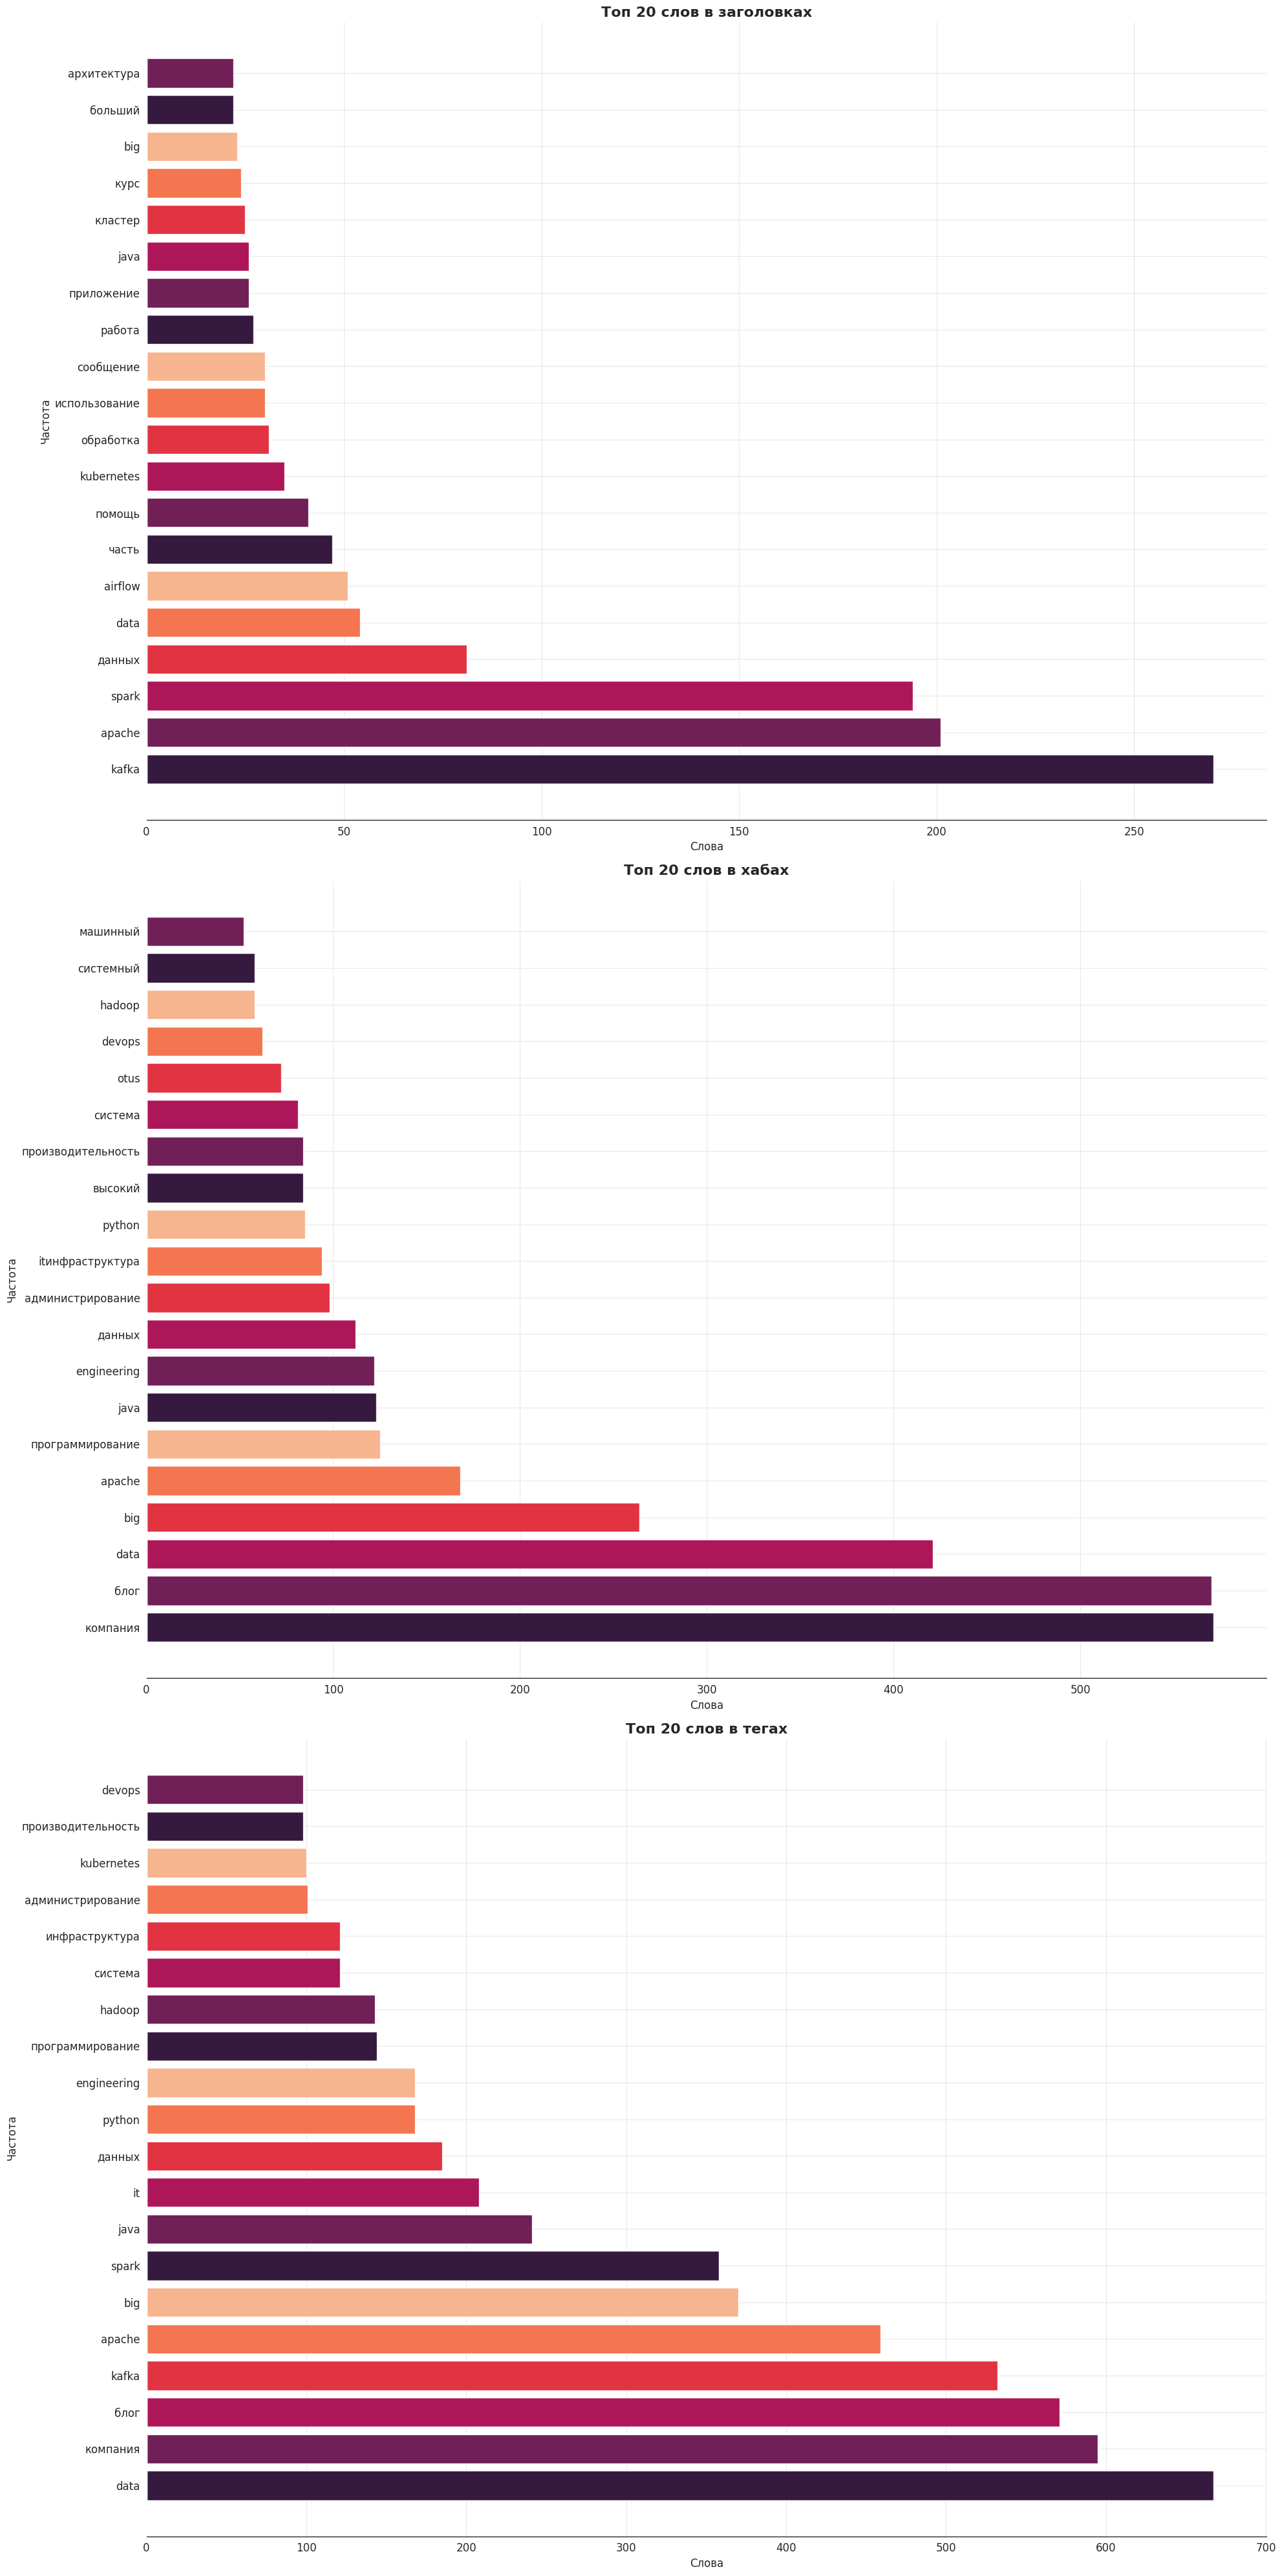

In [87]:

fig, axes = plt.subplots(3, 1, figsize=(20, 40))


titles = ["Топ 20 слов в заголовках", "Топ 20 слов в хабах", "Топ 20 слов в тегах"]

# Проходим по всем колонкам и соответствующим осям одновременно
for idx, (column, title) in enumerate(zip(['title_lemma', 'lemma_hub', 'tags_lemma'], titles)):

    tags, counts = zip(*FreqDist(habr_metadata[column].sum()).most_common(20)) # распаковывем массив с по трем колонкам и отбираем топ 20 слов в каждом поднаборе
    
    axes[idx].barh(tags, counts, color=sns.color_palette())
    axes[idx].set_title(title, fontsize = 16, fontweight='bold')
    axes[idx].set_xlabel("Слова", fontsize = 12)
    axes[idx].set_ylabel("Частота", fontsize = 12)

    axes[idx].spines["top"].set_visible(False)
    axes[idx].spines['right'].set_visible(False)
    axes[idx].spines["bottom"].set_color("black")
    axes[idx].spines['left'].set_color('white')
    axes[idx].spines['left'].set_linewidth(1)

plt.tight_layout()

plt.show()

In [79]:
from matplotlib.ticker import MultipleLocator

In [80]:
# мне нужно сгруппировать по году и месяцу частоту появления слов, то есть count слов kafka spark и airlfow и большие данные и big data или в title или hub или в тегах


exploded_df = habr_metadata.explode('title_lemma') # распаковка списка 
spark_counts = exploded_df[exploded_df['title_lemma'] == 'spark'] \
    .groupby('year')['title_lemma'] \
    .count() \
    .reset_index(name ='spark_count')


kafka_counts = exploded_df[exploded_df['title_lemma'] == 'kafka'] \
    .groupby('year')['title_lemma'] \
    .count() \
    .reset_index(name='kafka_count')



airflow_counts = exploded_df[exploded_df['title_lemma'] == 'airflow'] \
    .groupby('year')['title_lemma'] \
    .count() \
    .reset_index(name='airflow_count')



big_data_counts = exploded_df[exploded_df['title_lemma'].isin(['big', 'data', 'большие'])] \
    .groupby('year')['title_lemma'] \
    .count() \
    .reset_index(name='big_data_count')




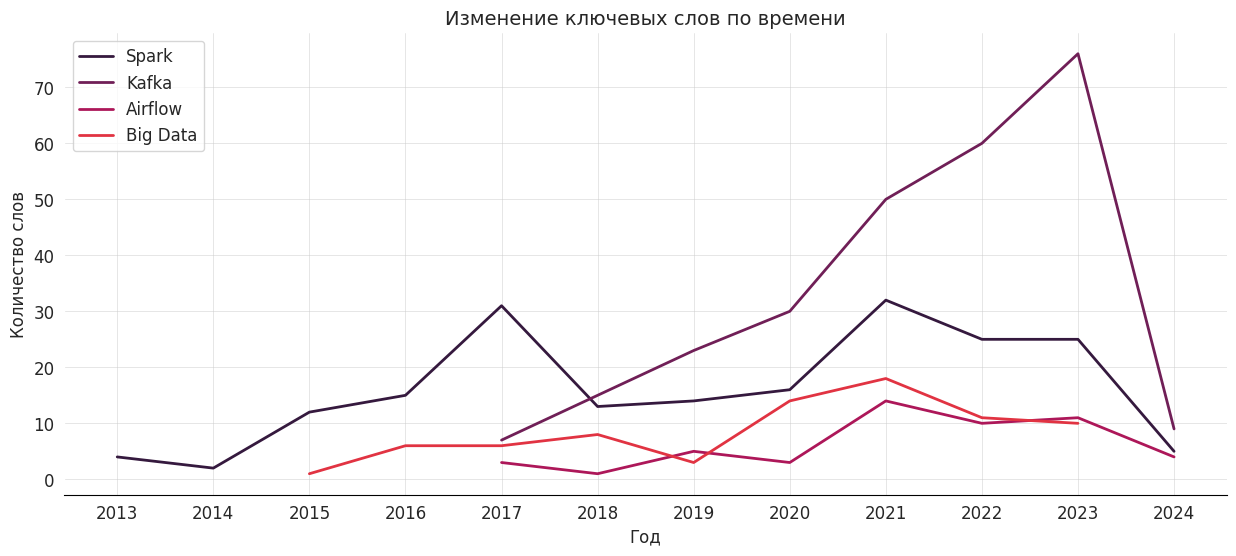

In [90]:
# построим график тенденции употребимости слов по годам
plt.figure(figsize=(15, 6))
plt.plot(spark_counts['year'], spark_counts['spark_count'],  linewidth=2, label='Spark')
plt.plot(kafka_counts['year'], kafka_counts['kafka_count'],linewidth=2, label='Kafka') 
plt.plot(airflow_counts['year'], airflow_counts['airflow_count'],  linewidth=2, label='Airflow') 
plt.plot(big_data_counts['year'], big_data_counts['big_data_count'],  linewidth=2, label='Big Data') 

ax = plt.gca()  
ax.xaxis.set_major_locator(MultipleLocator(1)) # деление через 1 год 


ax.spines["top"].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines["bottom"].set_color("black")
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(1)

plt.xlabel("Год")
plt.ylabel("Количество слов")
plt.title("Изменение ключевых слов по времени")

plt.legend()
plt.show()

## Теперь посмотрим динамику популярности статей

In [97]:

habr_metadata['year'] = habr_metadata.time.dt.year
habr_metadata['month'] = habr_metadata.time.dt.month
habr_metadata['day'] = habr_metadata.time.dt.day

# группировка данных по количеству просмотров, комментариев и сохранений
sum_by_metadata = habr_metadata \
    .groupby(['year']) \
    .agg(sum_of_views = ('views', 'sum'),
         sum_of_bookmarks = ('bookmarks', 'sum'),
         sum_of_comments = ('comments', 'sum')) \
    .reset_index() 



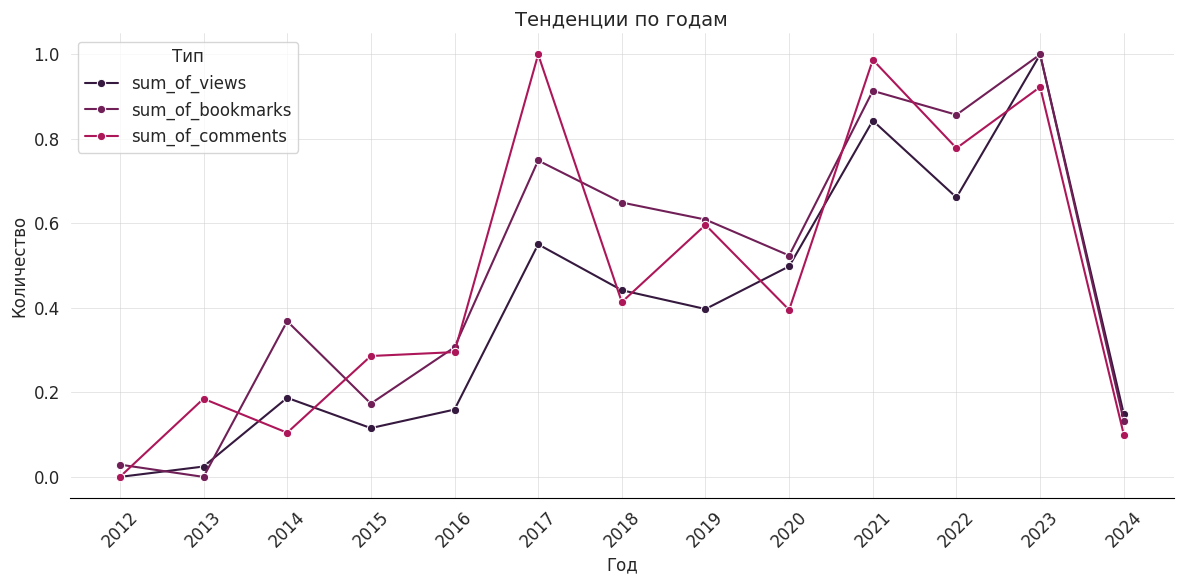

In [98]:
# нормализация данных к диапазону от 0 до 1 

for col in ['sum_of_views', 'sum_of_bookmarks', 'sum_of_comments']:
    sum_by_metadata[col] = (sum_by_metadata[col] - sum_by_metadata[col].min()) / (sum_by_metadata[col].max() - sum_by_metadata[col].min())

# Преобразование DataFrame для удобства работы с Seaborn
sum_by_metadata_melted = sum_by_metadata.melt('year', var_name='Type', value_name='Count')


plt.figure(figsize=(12, 6))



sns.lineplot(x='year', y='Count', hue='Type', data=sum_by_metadata_melted, marker='o')

ax = plt.gca() 
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.spines["top"].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines["bottom"].set_color("black")
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(1)

plt.title('Тенденции по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.legend(title='Тип')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Работа с времянными рядами

In [91]:
# импортируем функцию seasonal_decompose из statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import ttest_ind

In [93]:
# групировка по годам и месяцу
yearly_stats = habr_metadata.groupby(pd.Grouper(key='time', freq='M')).agg(
    total_views=('views', 'sum'),          
    total_observations=('views', 'count'),
    total_bookmarks = ('bookmarks','sum' ),
    total_comments = ('comments', 'sum')
).reset_index()

# создадим колонки с относительными наблюдениями 

yearly_stats['avg_views_per_observation'] = (
    yearly_stats['total_views'] / yearly_stats['total_observations']
)

yearly_stats['avg_bookmarks_per_observation'] = (
    yearly_stats['total_bookmarks'] / yearly_stats['total_observations']
)

yearly_stats['avg_comments_per_observation'] = (
    yearly_stats['total_comments'] / yearly_stats['total_observations']
) 
yearly_stats.head()

,time,total_views,total_observations,total_bookmarks,total_comments,avg_views_per_observation,avg_bookmarks_per_observation,avg_comments_per_observation
0,2012-01-31 00:00:00+00:00,68000,1,285,15,68000.0,285.0,15.0
1,2012-02-29 00:00:00+00:00,0,0,0,0,NaN,NaN,NaN
2,2012-03-31 00:00:00+00:00,0,0,0,0,NaN,NaN,NaN
3,2012-04-30 00:00:00+00:00,0,0,0,0,NaN,NaN,NaN
4,2012-05-31 00:00:00+00:00,0,0,0,0,NaN,NaN,NaN


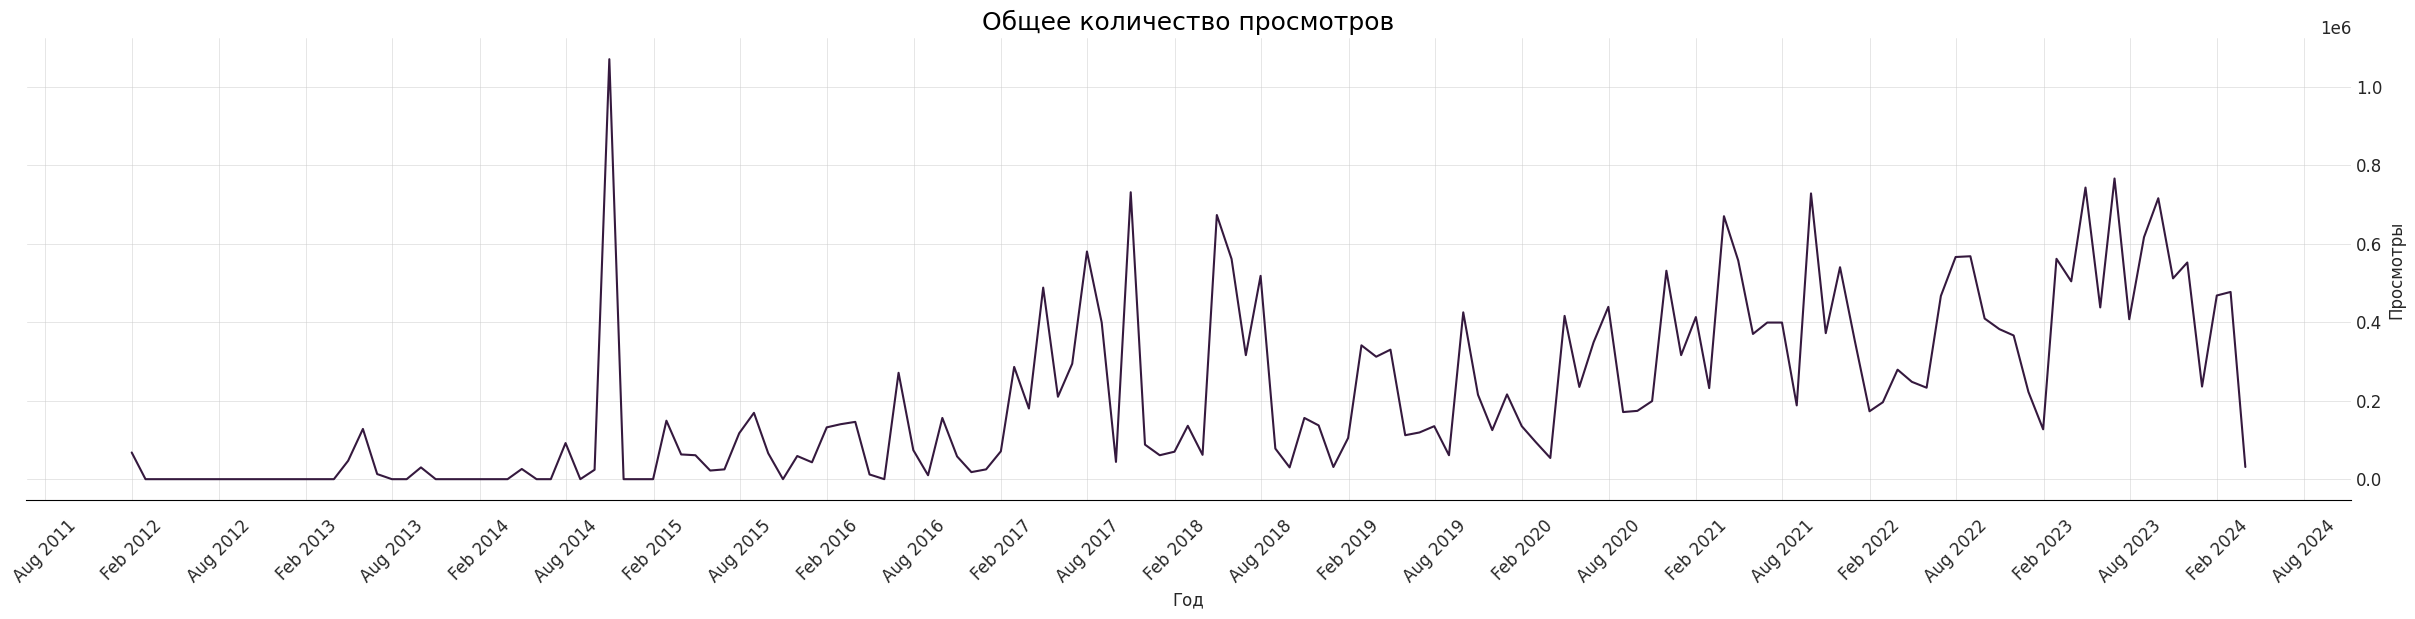

In [124]:

fig, ax = plt.subplots(figsize=(30, 6))
plt.title("Общее количество просмотров", fontsize=18, color = 'black')
plt.xlabel("Год")
plt.ylabel("Просмотры")

# График общего количества просмотров

plt.plot(yearly_stats['time'], yearly_stats['total_views'])


plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.tick_params(axis='x', length=8)

# Форматируем тики как год 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

ax.spines["top"].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines["bottom"].set_color("black")
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(1)
ax.yaxis.tick_right() # перенесение шкалы вправо
ax.yaxis.set_label_position("right") #перенесение шкалы вправо
ax.tick_params(axis='y', length=0)





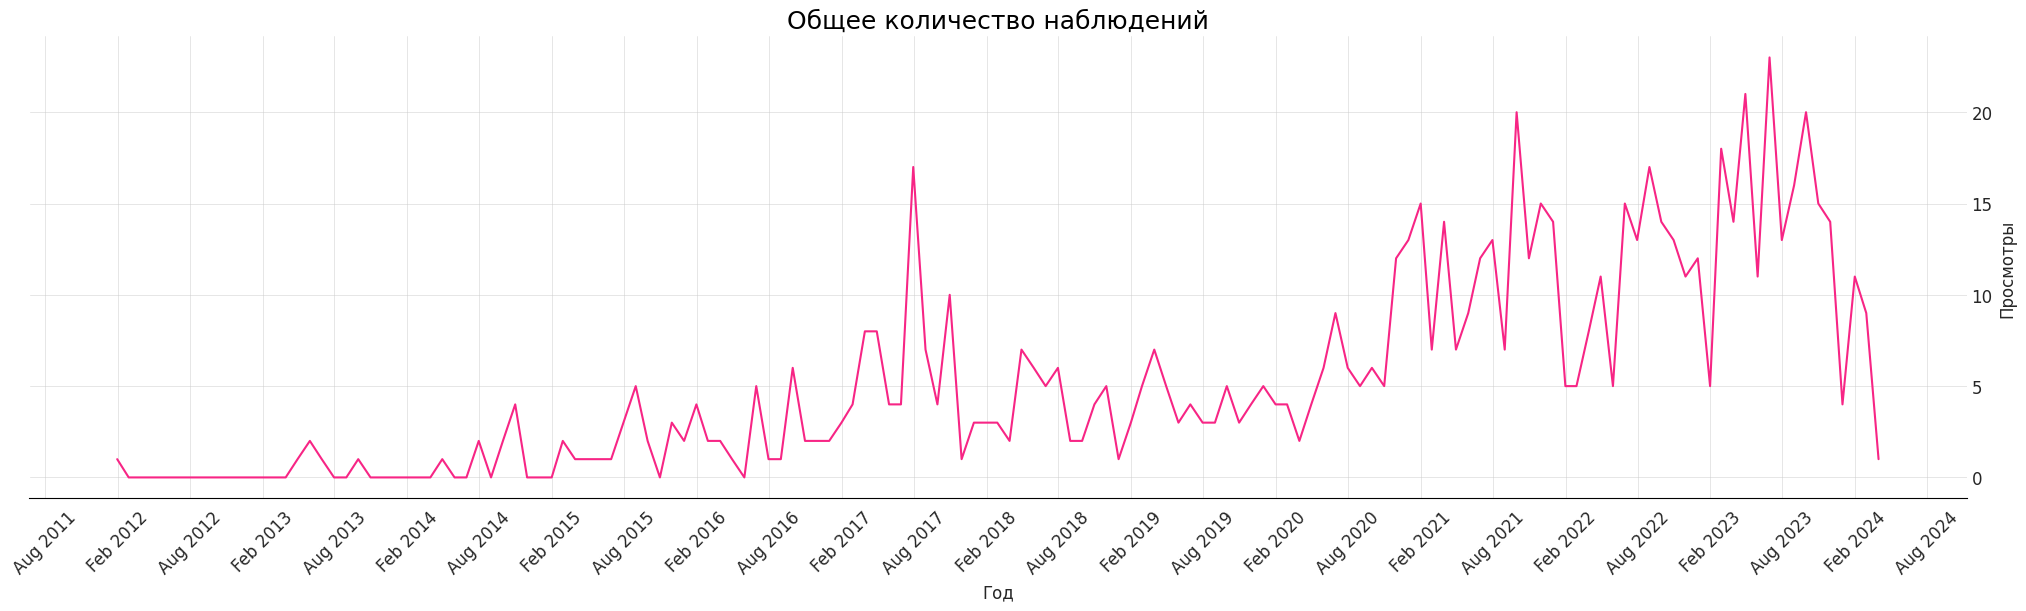

In [126]:
fig, ax = plt.subplots(figsize=(25, 6))
plt.title("Общее количество наблюдений", fontsize=18, color = 'black')

plt.xlabel("Год")
plt.ylabel("Просмотры")


plt.plot(yearly_stats['time'], yearly_stats['total_observations'], color = '#F72585')


plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)

ax.spines["top"].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines["bottom"].set_color("black")
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(1)
ax.yaxis.tick_right() 
ax.yaxis.set_label_position("right") 
ax.tick_params(axis='y', length=0)

### Теперь возьмем диапазоны по годам 

In [128]:

columns_to_fill = [
    'avg_views_per_observation',
    'avg_bookmarks_per_observation',
    'avg_comments_per_observation'
]

for column in columns_to_fill:
    yearly_stats[column] = yearly_stats.groupby(pd.Grouper(key='time', freq='Y'))[column].transform(lambda x: x.fillna(x.mean()))

filtered_2017 = yearly_stats[yearly_stats['time'].dt.year.isin([2017,2018])]
filtered_2022 = yearly_stats[yearly_stats['time'].dt.year.isin([2022,2023])]
other_periods = yearly_stats[~yearly_stats['time'].dt.year.isin([2017, 2018, 2022, 2023])]



yearly_stats['period'] = np.nan

# Применение условий для заполнения колонки
yearly_stats.loc[yearly_stats['time'].dt.year.isin([2017,2018]), 'period'] = 'period_2017'
yearly_stats.loc[yearly_stats['time'].dt.year.isin([2022, 2023]), 'period'] = 'period_2022'

yearly_stats['period'] = yearly_stats['period'].fillna('other_period')


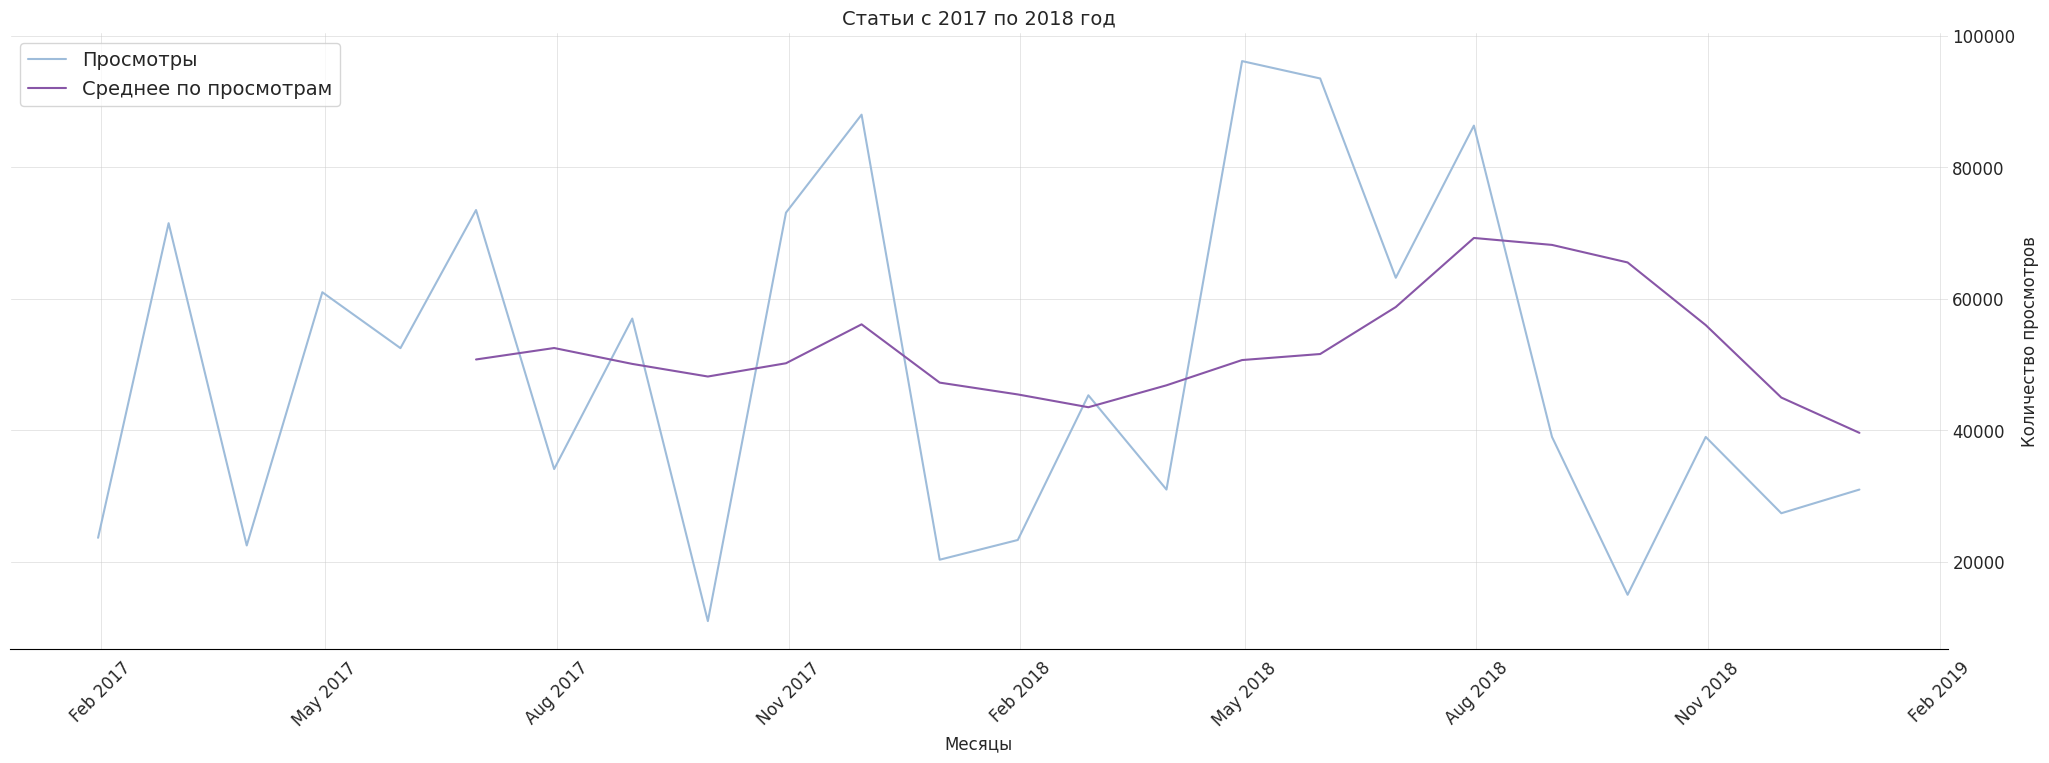

In [140]:

fig, ax = plt.subplots(figsize=(25, 8))

# поочередно зададим кривые перевозки и скользящее среднее с подписями и цветом
plt.plot(filtered_2017['time'], filtered_2017['avg_views_per_observation'], label = 'Просмотры', color = '#9ebcda')
plt.plot(filtered_2017['time'], filtered_2017['avg_views_per_observation'].rolling(window = 6).mean(), label = 'Среднее по просмотрам', color = '#8856a7')


plt.legend(title = '', loc = 'upper left', fontsize = 14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)

plt.xlabel('Месяцы')
plt.ylabel('Количество просмотров')
plt.title('Статьи с 2017 по 2018 год')

ax.spines["top"].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines["bottom"].set_color("black")
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(1)
ax.yaxis.tick_right() 
ax.yaxis.set_label_position("right") 
ax.tick_params(axis='y', length=0)

plt.show()

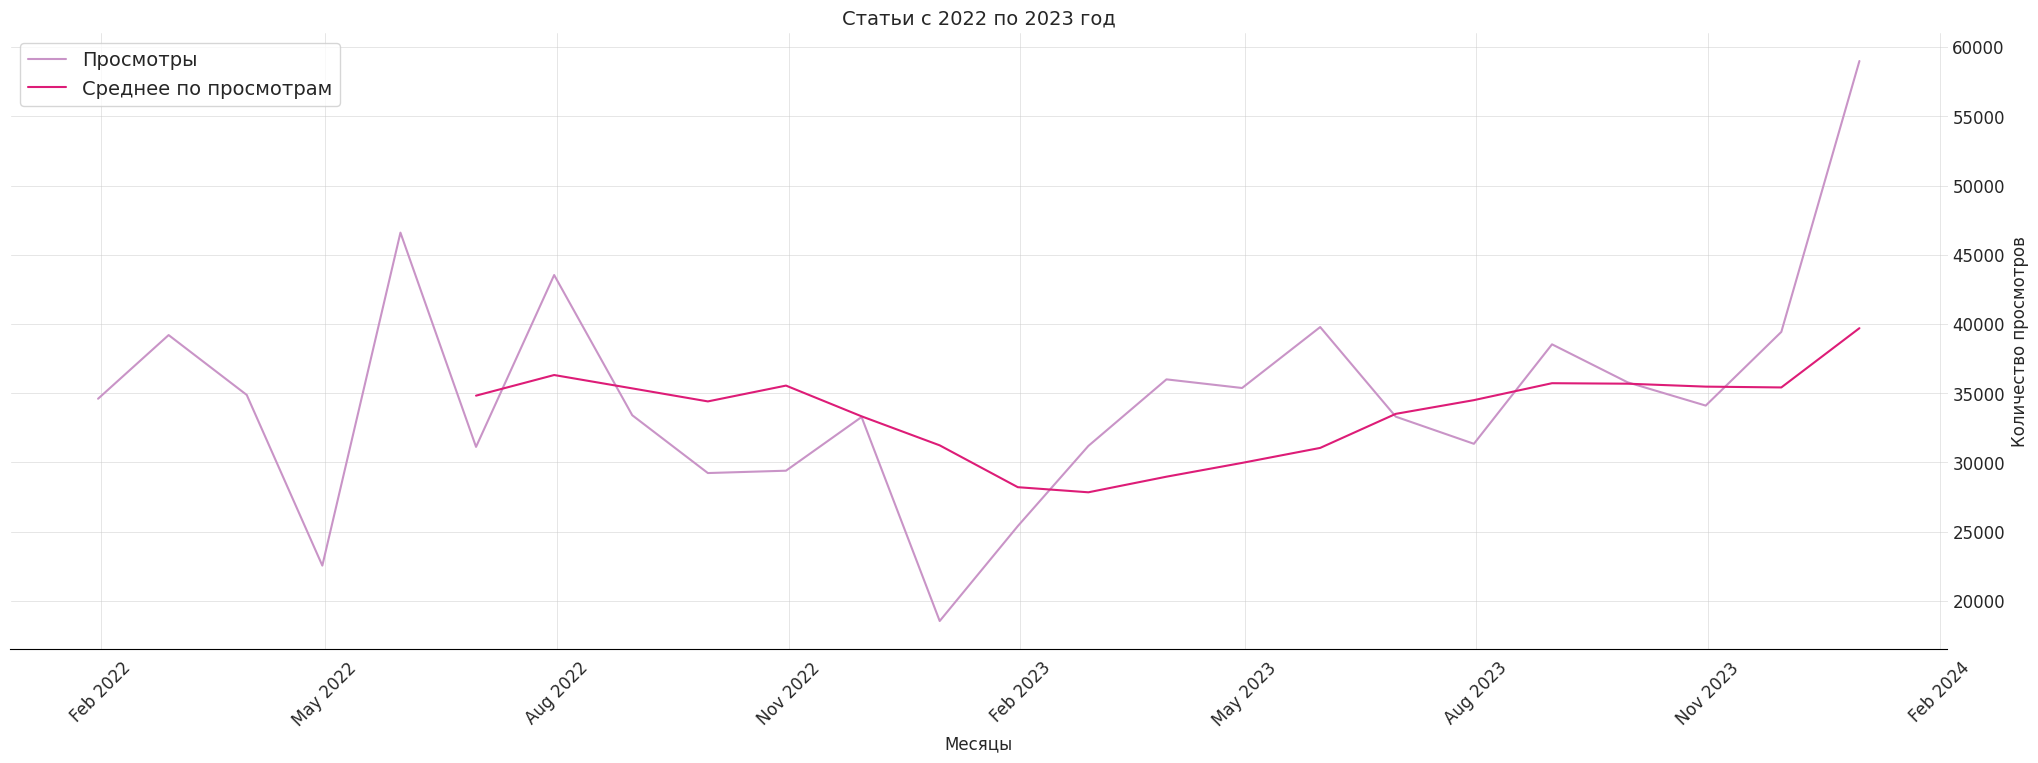

In [141]:
fig, ax = plt.subplots(figsize=(25, 8))

# поочередно зададим кривые перевозки и скользящее среднее с подписями и цветом
plt.plot(filtered_2022['time'], filtered_2022['avg_views_per_observation'], label = 'Просмотры', color = '#c994c7')
plt.plot(filtered_2022['time'], filtered_2022['avg_views_per_observation'].rolling(window = 6).mean(), label = 'Среднее по просмотрам', color = '#dd1c77')


plt.legend(title = '', loc = 'upper left', fontsize = 14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)

plt.xlabel('Месяцы')
plt.ylabel('Количество просмотров')
plt.title('Статьи с 2022 по 2023 год')

ax.spines["top"].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines["bottom"].set_color("black")
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(1)
ax.yaxis.tick_right() 
ax.yaxis.set_label_position("right") 
ax.tick_params(axis='y', length=0)

plt.show()

Теперь проверим главную гипотезу о том, что распределения в 2017-2018 год и 2022-2023 год значимо отличаются от всего распределения просмотров статей

In [143]:
from scipy.stats import mannwhitneyu

In [196]:

# Проведение теста Манна—Уитни при смещенной выборке
median_2017 = filtered_2017['avg_views_per_observation'].median()
median_other = other_periods['avg_views_per_observation'].median()

u_statistic, p_value = mannwhitneyu(filtered_2017['avg_views_per_observation'], other_periods['avg_views_per_observation'], alternative='two-sided')

print(f'U-статистика: {u_statistic}')
print(f'p-значение: {round(p_value, 2)}')
print(f'медианное значение в диапозоне 2017-2018: {round(median_2017, 2)}')
print(f'медианное значение по оставшейся выборке: {round(median_other, 2)}')


alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимое различие между группами по количеству просмотров статей в периоде 2018 года от общего количества просмотров")
else:
    print("Не удалось отвергнуть нулевую гипотезу: статистически значимого различия между группами не обнаружено.")

U-статистика: 1190.0
p-значение: 0.99
медианное значение в диапозоне 2017-2018: 42166.67
медианное значение по оставшейся выборке: 39166.67
Не удалось отвергнуть нулевую гипотезу: статистически значимого различия между группами не обнаружено.


In [176]:

median_2022 = filtered_2022['avg_views_per_observation'].median()


u_statistic, p_value = mannwhitneyu(filtered_2022['avg_views_per_observation'], other_periods['avg_views_per_observation'], alternative='two-sided')
print(f'U-статистика: {u_statistic}')
print(f'p-значение: {round(p_value, 2)}')
print(f'медианное значение в диапозоне 2022-2023: {round(median_2022, 2)}')
print(f'медианное значение по оставшейся выборке: {round(median_other, 2)}')

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимое различие между группами по количеству просмотров статей в периоде 2022 года от общего количества просмотров")
else:
    print("Не удалось отвергнуть нулевую гипотезу: статистически значимого различия между группами не обнаружено.")

U-статистика: 831.5
p-значение: 0.02
медианное значение в диапозоне 2022-2023: 34352.33
медианное значение по оставшейся выборке: 39166.67
Отвергаем нулевую гипотезу: существует статистически значимое различие между группами по количеству просмотров статей в периоде 2022 года от общего количества просмотров


In [197]:

u_statistic, p_value = mannwhitneyu(filtered_2022['avg_views_per_observation'], filtered_2017['avg_views_per_observation'], alternative='two-sided')
print(f'U-статистика: {u_statistic}')
print(f'p-значение: {round(p_value, 2)}')
print(f'медианное значение в диапозоне 2022-2023: {round(median_2022, 2)}')
print(f'медианное значение в диапозоне 2017-2018: {round(median_2017, 2)}')

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимое различие между группами по количеству просмотров статей в периоде 2022 года от общего количества просмотров")
else:
    print("Не удалось отвергнуть нулевую гипотезу: статистически значимого различия между группами не обнаружено.")

U-статистика: 225.0
p-значение: 0.2
медианное значение в диапозоне 2022-2023: 34352.33
медианное значение в диапозоне 2017-2018: 42166.67
Не удалось отвергнуть нулевую гипотезу: статистически значимого различия между группами не обнаружено.


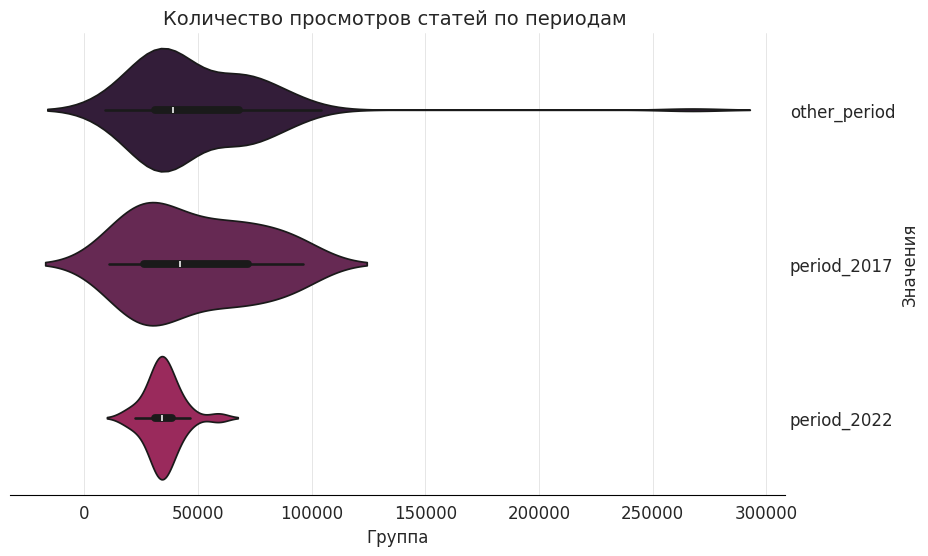

In [188]:
# Boxplot для проверки равенства дисперсий
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='avg_views_per_observation', y='period', data=yearly_stats, hue='period', orient='h')
plt.title("Количество просмотров статей по периодам ")
plt.xlabel("Группа")
plt.ylabel("Значения")



ax.spines["top"].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines["bottom"].set_color("black")
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(1)
ax.yaxis.tick_right() 
ax.yaxis.set_label_position("right") 
ax.tick_params(axis='y', length=0)


plt.show()

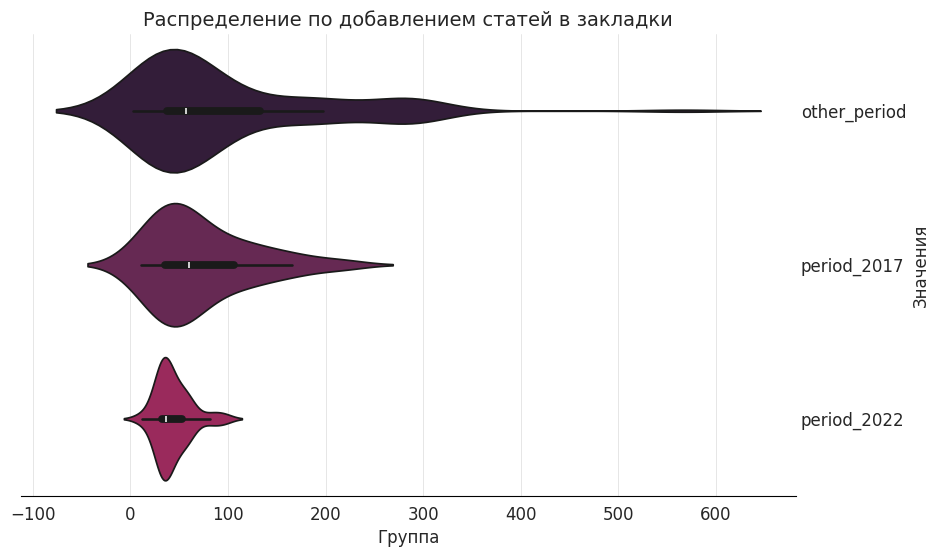

In [189]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='avg_bookmarks_per_observation', y='period', data=yearly_stats, hue='period', orient='h')
plt.title("Распределение по добавлением статей в закладки")
plt.xlabel("Группа")
plt.ylabel("Значения")



ax.spines["top"].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines["bottom"].set_color("black")
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(1)
ax.yaxis.tick_right() 
ax.yaxis.set_label_position("right") 
ax.tick_params(axis='y', length=0)


plt.show()

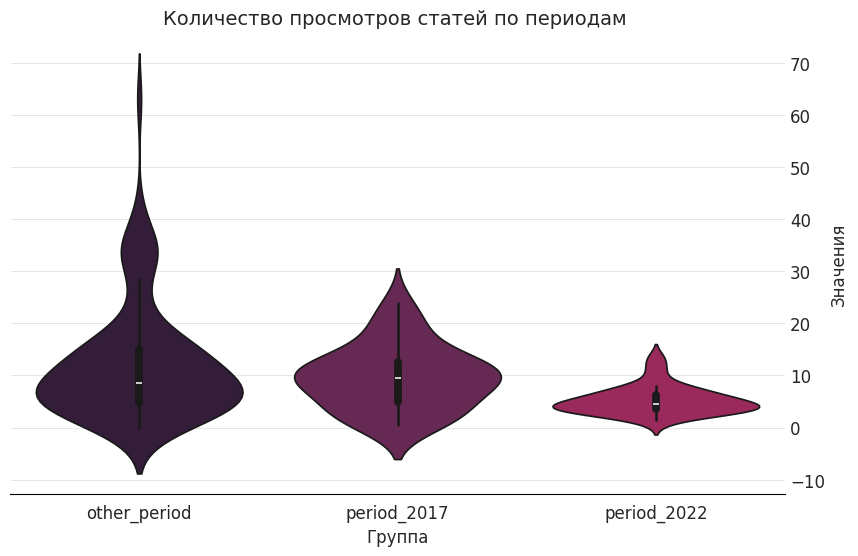

In [158]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='period', y='avg_comments_per_observation', data=yearly_stats, hue='period')
plt.title("Количество просмотров статей по периодам ")
plt.xlabel("Группа")
plt.ylabel("Значения")



ax.spines["top"].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines["bottom"].set_color("black")
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(1)
ax.yaxis.tick_right() 
ax.yaxis.set_label_position("right") 
ax.tick_params(axis='y', length=0)


plt.show()

# Работа с топик моделированием 

In [20]:
import gensim

from gensim.models.coherencemodel import CoherenceModel

In [38]:
list_of_title = habr_metadata['title_lemma'].to_list()



Функция вычисляет метрики для оценки тем моделирования и выводит 
график, где по оси x отложено количество топиков, а по оси y — значение 
метрики
dictionary: словарь для тематического моделирования
corpus: корпус в виде мешка слов
texts: тексты документов



In [178]:
def coherence_score(dictionary, corpus, texts, max, start=2, step=3,
                    measure="c_v"):
    coherence_values = []
    for num_topics in range(start, max, step):
        model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, 
                                           passes=10, num_topics=num_topics, 
                                           random_state=6457)
        coherencemodel = CoherenceModel(model=model, texts=texts, 
                                        dictionary=dictionary, 
                                        coherence=measure)
        coherence_values.append(coherencemodel.get_coherence())
    x = range(start, max, step)
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel(measure + "score")
    plt.legend(("coherence_score"), loc='best')
    
    ax.spines["top"].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines["bottom"].set_color("black")
    ax.spines['left'].set_color('white')
    ax.spines['left'].set_linewidth(1)
    ax.yaxis.tick_right() 
    ax.yaxis.set_label_position("right") 
    ax.tick_params(axis='y', length=0)
    plt.show() 

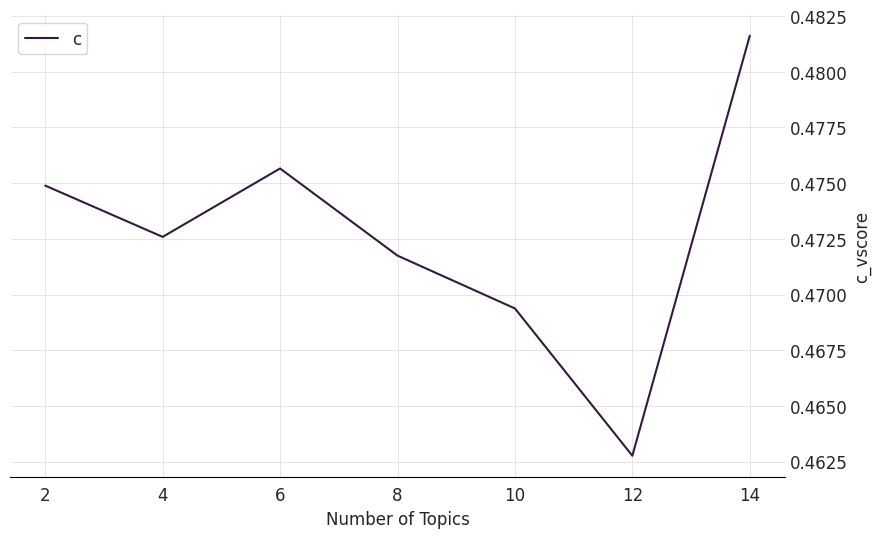

In [179]:
gensim_dictionary = gensim.corpora.Dictionary(list_of_title)
gensim_dictionary.filter_extremes(no_above=0.15, no_below=15)
gensim_dictionary.compactify()
corpus = [gensim_dictionary.doc2bow(text) for text in list_of_title]



coherence_score(dictionary=gensim_dictionary, corpus=corpus, texts=list_of_title, start=2, max=15, step=2, measure="c_v")

In [181]:

          
lda_6 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=6, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)
lda_6.print_topics()

coherence_model_lda = CoherenceModel(model=lda_6,
                                     texts = list_of_title,
                                     dictionary=gensim_dictionary,
                                     coherence="c_v")
coherence_lda = coherence_model_lda.get_coherence()
 
print("\nCoherence Score: ", coherence_lda)


Coherence Score:  0.4756592005097679


/tmp/ipykernel_376740/1025570667.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/tmp/ipykernel_376740/1025570667.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/tmp/ipykernel_376740/1025570667.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/tmp/ipykernel_376740/1025570667.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.loc[df.topic_id=

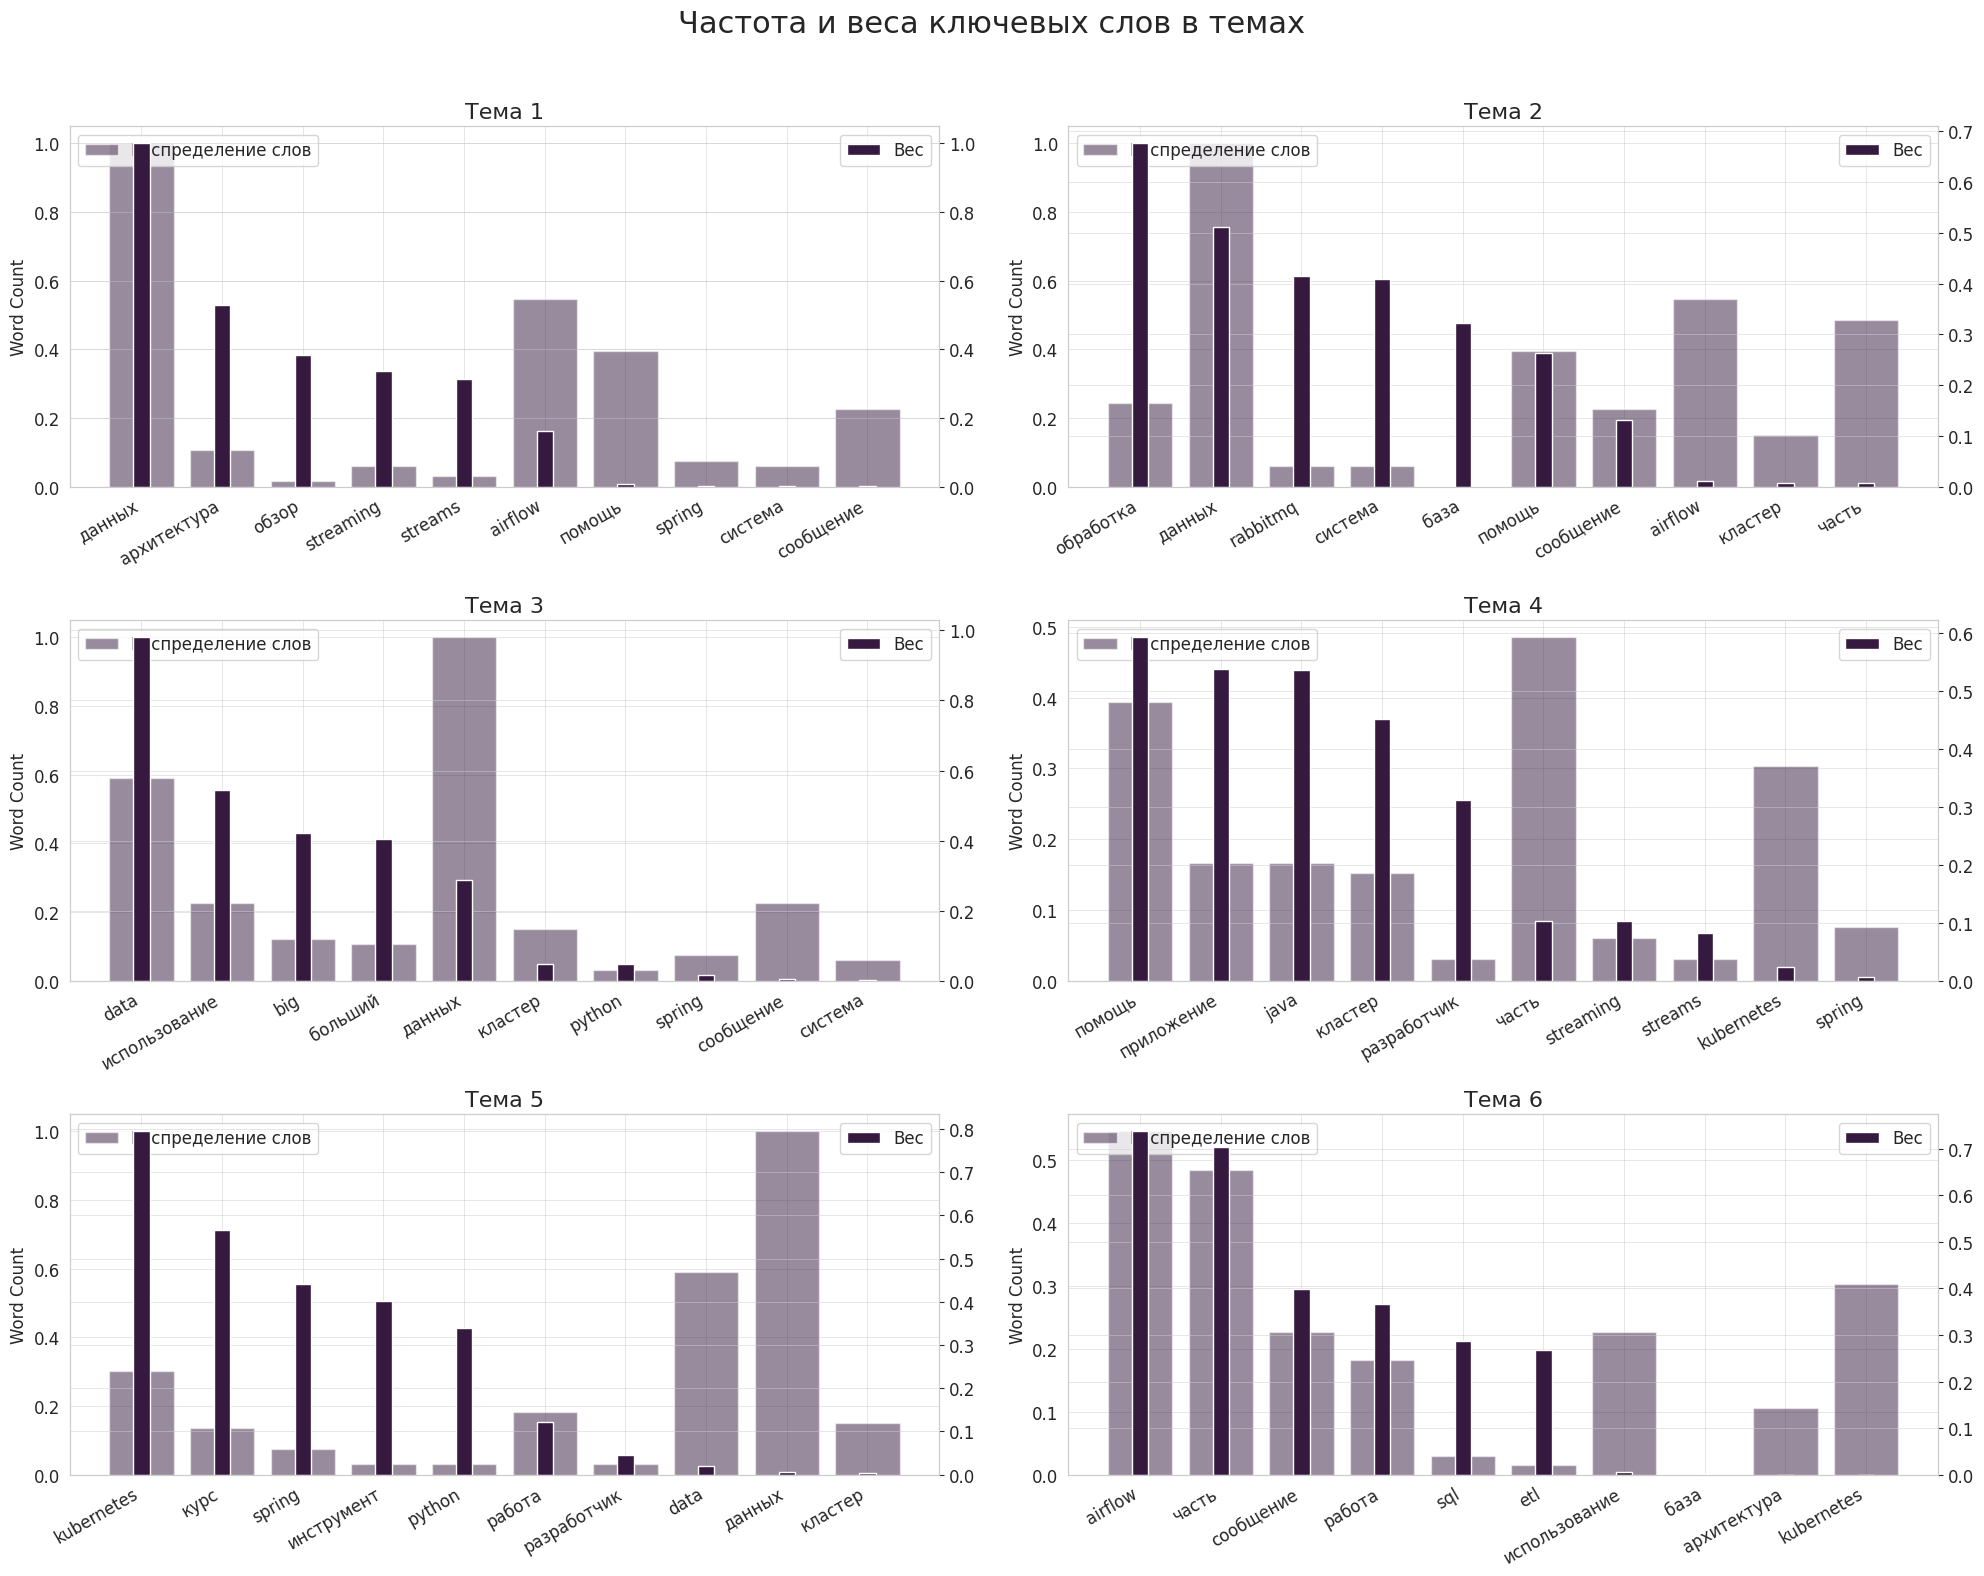

In [185]:
from collections import Counter
# import matplotlib.colors as mcolors


topics = lda_6.show_topics(formatted=False)
flat_data = [w for w_list in list_of_title for w in w_list] # распаковываем массив и собираем все слова из заголовков в плоский список
counter = Counter(flat_data)

out = []
for number, topic in topics: # topics представляет собой список кортежей с словами и вероятностью с которой эти слова описывают топик
    for word, weight in topic:
        out.append([word, number , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

for col in ['word_count', 'importance']:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min()) # нормализация диапазона количества слов и  доли в топике 


fig, axes = plt.subplots(3, 2, figsize=(20,15))
# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], width=0.8, alpha=0.5, label='Распределение слов')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], width=0.2, label='Вес')
    ax.set_ylabel('Word Count')
    # ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Тема ' + str(i+1), fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Частота и веса ключевых слов в темах', fontsize=22, y=1.05)
plt.show()